### Question 3

Consider Problem. 2, in order to reduce the computational domain and cost, assume a proper boundary condition in the given domain that leads to optimum computational domain and cost of the given problem and determine the temperature distribution. Compare the results with the results of Problem. 2.

In [100]:
# Importing the relevant Python modules
import numpy as np
import matplotlib.pyplot as plt

Taking the heat conduction equation as the Laplace equation:

$$ \frac{d^2T}{dx^2} + \frac{d^2T}{dy^2} = 0$$

Since taking $\Delta x = \Delta y = 0.01$ does not reduce the accuracy that much, but reduces the computational cost quite a bit, we can consider it.

In [101]:
# Initializing the variables

x = 0.5                 # x-length of the plate in m
y = 0.5                 # y-length of the plate in m
dx = 0.01 
nx = int(x/dx + 1)      # Total number of divisions in the x-direction
dy = 0.01
ny = int(y/dy + 1)      # Total number of divisions in the y-direction

q = 1E5                 # Heat flux in the top wall in W/m^2
k = 41                  # Thermal conductivity in W/mK

print(nx, ny, q)

51 51 100000.0


In [102]:
# Forming the grid

xarr = np.linspace(0, x, nx)     # 1-D Array of Xs
yarr = np.linspace(0, y, ny)     # 1-D Array of Ys

T = np.zeros((nx, ny))           # 2-D array of temperature in the plate

### Boundary Conditions

Instead of considering the top wall to have a constant heat flux of $10^5 W/m^2$, let us consider an isothermal condition of T = $-450°C$. This temperature is chosen based on the previous question, where we can see from the contour plot that the temperature at the top boundary is approximately $-450°C$.

In [103]:
# Applying the boundary conditions

T[0, :] = -450     # New boundary condition for the top
T[:, 0] = 0        # Vertical side
T[:, -1] = 0       # Vertical side
T[-1, :] = 0       # Insulated bottom

print(T)           # This is the initial temperature distribution in the square plate

[[   0. -450. -450. ... -450. -450.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


### Discretizing the Laplace Equation (Finite Difference Method)

The discretized Laplace equation is: 
$$ \frac{T_{i+1, j} - 2T_{i, j} + T_{i-1, j}}{\Delta x^2} + \frac{T_{i, j+1} - 2T_{i, j} + T_{i, j-1}}{\Delta y^2} = 0 $$

This becomes,

$$ T_{i, j} = 0.25(T_{i+1, j} + T_{i-1, j} + T_{i, j+1} + T_{i, j-1}) $$

### Using the Successive Over-Relaxation Method

To improve the rate of convergence of the solution, we can use the successive over-relaxation method. This method requires a relaxation parameter $\omega$ where $1 < \omega < 2$. This parameter allows for an increased rate of convergence so that it takes lesser number of iterations.

Using the SOR method, the discretized equation now becomes:

$$ T_{i, j} = 0.25\omega (T_{i+1, j} + T_{i-1, j} + T_{i, j+1} + T_{i, j-1}) + (1 - \omega)T_{i,j}^{old}$$

In [104]:
def T_dist(T, nt, err, w):
    """
    T_dist is the function that calculates the temperature distribution in the plate by applying the conditions given. 
    It is solved using the Successive Over-Relaxation (SOR) iterative method.
    
    Here, T is the initial temperature distribution of the plate.
    nt is the maximum number of iterations.
    err is the maximum permissible error. 
    w is the relaxation parameter for the SOR method.
    
    This function iterates according to the discretization of the Laplace equation and the constant temperature across the top wall.
    It returns the final temperature distribution of the plate once it satisfies the convergence criterion.
    
    """
    for t in range(1, nt+1):           # t is a single iteration of the maximum number of iterations i.e. nt iterations
        Tn = T.copy()             # A copy of the previous iteration is made to check for the error
        
        # The SOR iteration
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                T[i,j] = 0.25*w*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]) + (1-w)*Tn[i,j]
        
        if t%200 == 0:                 # The temperature distribution is printed every 200 iterations to check
            print(T)
        
        # Here, the error is calculated by finding the difference between the current iteration and the previous iteration 
        # and ensuring that the difference of all the nodes in the 2-D array are less than the max permissible error.
        
        if (abs(T - Tn) < err).all():
            print('\n')
            print("Iteration number: ", t)       # If the condition is satisfied, the number of iterations taken is printed
            print("The temperature distribution: ", T)  # The final temperature distribution is printed
            return T
        
    return T

We need to find the optimum relaxation parameter so as to perform the calculation efficiently i.e. with the least amount of iterations possible. I conducted several trials with multiple relaxation parameters to find the most optimum one. The results are as below:

 | **$\omega$** | **Iterations** |
 |--------------|----------------|
 | 1.1 | 2346  |  
 | 1.2 | 1943 |
 |1.3 | 1595 |
 |1.4 | 1290 |
 |1.5 | 1019 |
 |1.6 | 776 |
 |1.7 | 552 |
 |1.8 | 341 |
 |1.9 | 170 |
 |1.95 | 326 |

From the table, we can see that $\omega = 1.9$ is an optimum relaxation parameter as it takes only 170 iterations.

In [105]:
# The calculation is carried out with the initial array T, a max iterations of 10,000, an error of 10^-5 and a relaxation
# parameter w = 1.9, the most optimum one.

T_final = T_dist(T, 10000, 1E-5, 1.9)



Iteration number:  170
The temperature distribution:  [[ 0.00000000e+00 -4.50000000e+02 -4.50000000e+02 ... -4.50000000e+02
  -4.50000000e+02  0.00000000e+00]
 [ 0.00000000e+00 -2.24802943e+02 -3.13549122e+02 ... -3.13549122e+02
  -2.24802942e+02  0.00000000e+00]
 [ 0.00000000e+00 -1.35662645e+02 -2.24211771e+02 ... -2.24211772e+02
  -1.35662645e+02  0.00000000e+00]
 ...
 [ 0.00000000e+00 -3.94929847e-01 -7.88228447e-01 ... -7.88228459e-01
  -3.94929762e-01  0.00000000e+00]
 [ 0.00000000e+00 -1.97058225e-01 -3.93303252e-01 ... -3.93303177e-01
  -1.97058240e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


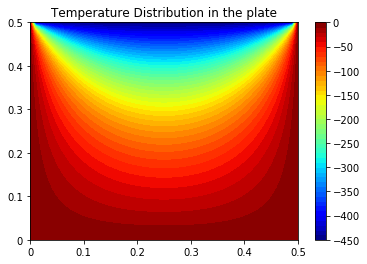

<Figure size 432x288 with 0 Axes>

In [106]:
# The function is now plotted. The plot displays the contours of the temperature distribution.

# The parameters of the contour plot are initialized
colorinterpolation = 50
colourMap = plt.cm.jet

# Setting the meshgrid
X, Y = np.meshgrid(np.arange(0, nx), np.arange(0, ny))

final_T = np.flip(T_final, axis=0)  

#Plotting the contour
fig, ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, final_T, colorinterpolation, cmap=colourMap)
fig.colorbar(cp)

# Adding formatting to the plot
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5])
ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5])
ax.set_title("Temperature Distribution in the plate")
plt.show()

#Saving the plot
plt.savefig("contourplot_3.jpg")

### The Conclusion

The contour plot shows that the temperature across the vertical sides and the insulated bottom is zero, as expected. This time, the isothermal boundary condition across the top phase results in the temperature distribution as indicated in the plot.

We made 3 simplifications to the problem:

1. We increased the size of each cell from dx = dy = 0.001 to dx = dy = 0.01. This results in some sacrifice in the accuracy, but an increased rate of convergence.

2. Instead of a constant heat flux condition, we adopted an isothermal condition at the top boundary. Again, this reduces the accuracy slightly, but the computational expenses are decreased.

3. Finally, instead of solving directly explicitly, we used the Successive Over-Relaxation iterative method to bring the number of iterations down. 

As a result of these simplifications, the number of iterations to converge to the answer drastically reduces from 4,65,035 iterations to 170. But the accuracy is not sacrificed very much, and this is reflected in the contour plot, where the temperature distribution retains a similar nature.